# Question 4

In [33]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
# from tqdm import tqdm

np.random.seed(42)

In [34]:
df = pd.read_csv('CC General.csv', index_col=0)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Exploratory Data Analysis

In [35]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [36]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [37]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [38]:
df.dropna(inplace=True)

In [39]:
len(df.columns)

17

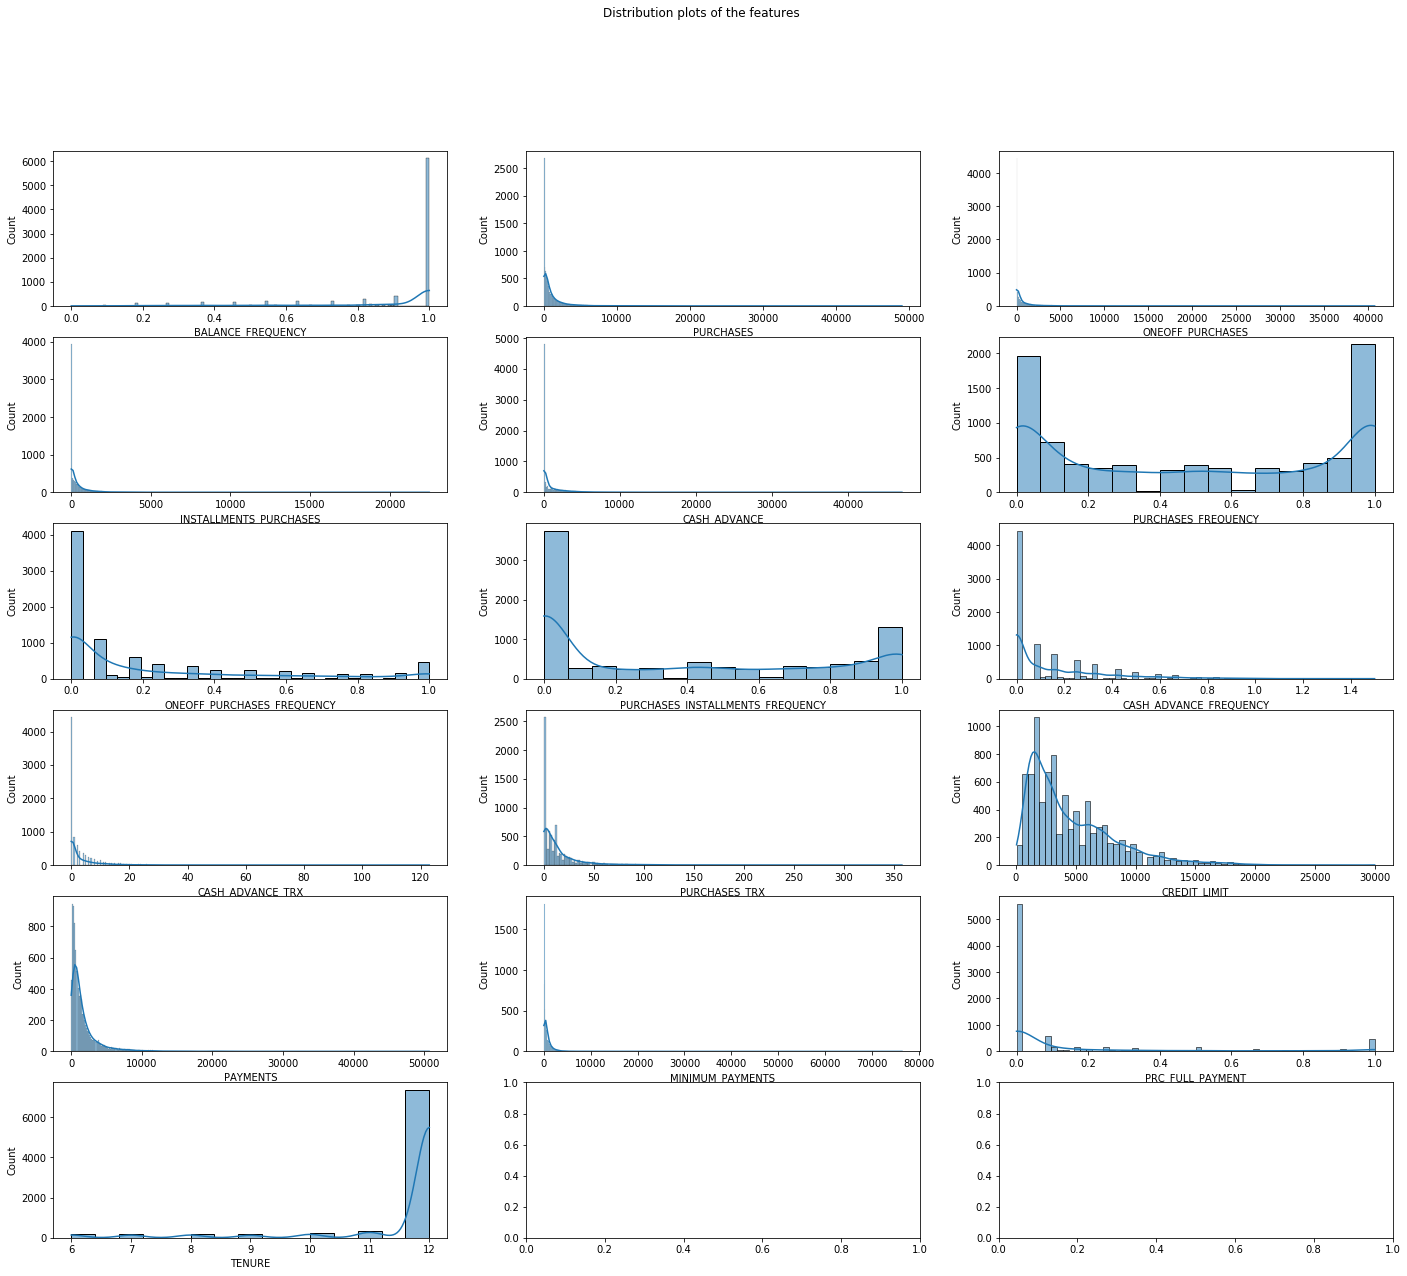

In [40]:
fig, axes = plt.subplots(6, 3, figsize=(24,20))
fig.suptitle("Distribution plots of the features")
for col,ax in zip(df.drop([df.columns[0]], axis=1).columns, axes.flat):
    sns.histplot(df[col], kde=True, ax=ax)
plt.show()

## Data Normalization
Each feature in the data is normalized using the L2 standard

In [41]:
scaled = preprocessing.normalize(df, axis=0)
scaled_df = pd.DataFrame(scaled, columns=df.columns, index=df.index)
scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,0.000167,0.009582,0.000428,0.000000,0.001017,0.000000,0.002811,0.000000,0.001652,0.000000,0.000000,0.000734,0.001850,0.000636,0.000595,0.000000,0.011124
C10002,0.013067,0.010647,0.000000,0.000000,0.000000,0.029594,0.000000,0.000000,0.000000,0.011015,0.005615,0.000000,0.012949,0.012935,0.004570,0.007109,0.011124
C10003,0.010181,0.011712,0.003470,0.004649,0.000000,0.000000,0.016867,0.029571,0.000000,0.000000,0.000000,0.004403,0.013874,0.001961,0.002673,0.000000,0.011124
C10005,0.003337,0.011712,0.000072,0.000096,0.000000,0.000000,0.001406,0.002464,0.000000,0.000000,0.000000,0.000367,0.002220,0.002139,0.001043,0.000000,0.011124
C10006,0.007385,0.011712,0.005985,0.000000,0.014217,0.000000,0.011245,0.000000,0.011567,0.000000,0.000000,0.002936,0.003330,0.004414,0.010259,0.000000,0.011124


In [42]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   float64
 11  PURCHASES_TRX                     8636 non-null   float64
 12  CRED

In [43]:
scaled_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8.636000e+03,8.636000e+03,8636.000000,8636.000000
mean,0.006534,0.010482,0.004603,0.003637,0.004488,0.004566,0.008366,0.006089,0.007313,0.006063,0.004652,0.005516,0.008365,5.625808e-03,3.683456e-03,0.005096,0.010692
std,0.008551,0.002432,0.009727,0.010128,0.009781,0.009744,0.006768,0.008873,0.007894,0.008891,0.009704,0.009240,0.006769,9.173569e-03,1.011130e-02,0.009478,0.001215
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000092,1.560964e-07,8.166802e-08,0.000000,0.005562
25%,0.000604,0.010647,0.000195,0.000000,0.000000,0.000000,0.001406,0.000000,0.000000,0.000000,0.000000,0.000367,0.002960,1.319565e-03,7.209337e-04,0.000000,0.011124
50%,0.003741,0.011712,0.001685,0.000271,0.001011,0.000000,0.008433,0.002464,0.003305,0.000000,0.000000,0.002569,0.005550,2.826891e-03,1.331595e-03,0.000000,0.011124
75%,0.008590,0.011712,0.005144,0.003602,0.005163,0.005201,0.015461,0.009857,0.014872,0.011015,0.005615,0.006605,0.012024,6.151239e-03,3.518064e-03,0.005332,0.011124
max,0.077703,0.011712,0.220119,0.245103,0.239926,0.216512,0.016867,0.029571,0.019829,0.066089,0.172668,0.131366,0.055496,1.599063e-01,3.256246e-01,0.031991,0.011124


## K-Center Greedy Algorithm
We create classes for vertex, cluster and the KCenter clusterer.
We can fit the data for greedy algorithm using ```fit_k_approx``` and for optimal fitting we can use ```fit_k_optimal```.

In [44]:
class Vertex:
    def __init__(self, arr):
        self.arr = arr
        self.cluster = None
        self.min_dist = None
        
    def get_dist(self, vertex):
        return np.linalg.norm(vertex.arr-self.arr)

In [45]:
class Cluster:
    def __init__(self, center):
        self.center = center
        self.vertices = set([self.center])
        self.cost = 0
        
    def add_vertex(self, vertex):
        self.vertices.add(vertex)
        
    def remove_vertex(self, vertex):
        self.vertices.discard(vertex)

In [46]:
class KCenter:
    def __init__(self, datapoints):
        self.data_copy = datapoints
        self.datapoints = np.array([Vertex(datapoint) for datapoint in self.data_copy])
        
        self.clusters = []
        self.unassigned = set([i for i in range(len(self.datapoints))])
        
    def fit_k_approx(self, k):
        self.reset()
        center_count = 0
        first_center = np.random.choice(self.datapoints)
#         first_center = self.datapoints[0]
        self.clusters.append(Cluster(first_center))
        self.unassigned.discard(first_center)
        center_count+=1
        
        while center_count<k:
            farthest = None
            max_dist = 0
            for ind in range(len(self.datapoints)):
                vertex = self.datapoints[ind]
                self.update_distances(vertex)
                if (vertex.min_dist > max_dist) and ind in self.unassigned:
                    max_dist = vertex.min_dist
                    farthest = vertex
            
            self.clusters.append(Cluster(farthest))
            center_count+=1
            self.unassigned.discard(farthest)
            
        for ind in range(len(self.datapoints)):
            vertex = self.datapoints[ind]
            self.update_distances(vertex)
        
        tot_cost = self._update_costs()
        return self.clusters, tot_cost
    
    def fit_k_optimal(self, k):
        self.reset()
        
        combinations = itertools.combinations(self.datapoints, k)
        
        best_clusters, best_cost = None, None
        
        for comb in list(combinations):
            self.reset()
            for c in comb:
                self.clusters.append(Cluster(c))
            for ind in range(len(self.datapoints)):
                vertex = self.datapoints[ind]
                self.update_distances(vertex)
            tot_cost = self._update_costs()
            
#             print("Total Cost: {}, Best Cost: {}".format(tot_cost, best_cost))
            
            if best_cost is None:
                best_cost = tot_cost
                best_clusters = self.clusters
            else:
                if tot_cost < best_cost:
                    best_cost = min(best_cost, tot_cost)
                    best_clusters = self.clusters
                    
        self.reset()
        self.clusters = best_clusters
        for ind in range(len(self.datapoints)):
            vertex = self.datapoints[ind]
            self.update_distances(vertex)
#             print("Vertex: {}, Cluster: {}".format(vertex.arr, vertex.cluster.center.arr))
        return self.clusters, best_cost
    
    def update_distances(self, vertex):
        for cluster in self.clusters:
            center = cluster.center
            dist = center.get_dist(vertex)
#             print("Center: {}, vertex: {}, distance: {}".format(center.arr, vertex.arr, dist))
            if vertex.min_dist is None:
                vertex.min_dist = dist
                vertex.cluster = cluster
                cluster.add_vertex(vertex)
            else:
                if dist < vertex.min_dist:
                    vertex.min_dist = dist
                    if vertex.cluster is not None:
                        vertex.cluster.remove_vertex(vertex)
                    vertex.cluster = cluster
                    cluster.add_vertex(vertex)
    
    def _update_costs(self):
        curr_cost = 0
#         print("Cluster costs and total cost")
        for cluster in self.clusters:
            center = cluster.center
            for vertex in cluster.vertices:
                cluster.cost = max(cluster.cost, center.get_dist(vertex))
            curr_cost = max(curr_cost, cluster.cost)
#             print("The cluster cost is: {} and total cost is: {}".format(cluster.cost, curr_cost))
            
        return curr_cost
    
    def reset(self):
        self.clusters = []
        self.unassigned = set([i for i in range(len(self.datapoints))])
        self.datapoints = np.array([Vertex(datapoint) for datapoint in self.data_copy])
        

In [47]:
clusterer = KCenter(scaled)

In [48]:
c_2 = clusterer.fit_k_approx(2)
c_4 = clusterer.fit_k_approx(4)
c_10 = clusterer.fit_k_approx(10)

print("Cost for 2 center approx: ", c_2[1])
print("Cost for 4 center approx: ", c_4[1])
print("Cost for 10 center approx: ", c_10[1])

Cost for 2 center approx:  0.3356439103658775
Cost for 4 center approx:  0.231364705566033
Cost for 10 center approx:  0.15686360856280215


In [49]:
num_samples = 20
scaled_sample = scaled[np.random.choice(scaled.shape[0], num_samples, replace=False)]

We run the optimal clustering on a small sample of data as the time complexity is too high to run on whole dataset.

In [50]:
new_clusterer = KCenter(scaled_sample)

In [51]:
c_opt_2 = new_clusterer.fit_k_optimal(2)
c_opt_4 = new_clusterer.fit_k_optimal(4)
c_approx_2 = new_clusterer.fit_k_approx(2)
c_approx_4 = new_clusterer.fit_k_approx(4)


print("Cost for 2 center exact: ", c_opt_2[1])
print("Cost for 4 center exact: ", c_opt_4[1])
print("Cost for 2 center approx: ", c_approx_2[1])
print("Cost for 4 center approx: ", c_approx_4[1])

Cost for 2 center exact:  0.04042261414215996
Cost for 4 center exact:  0.033439246247001946
Cost for 2 center approx:  0.048602981019055615
Cost for 4 center approx:  0.03774269452645553


In [52]:
print("Approximation factor for 2 centers is: {}".format(c_approx_2[1]/c_opt_2[1]))
print("Approximation factor for 4 centers is: {}".format(c_approx_4[1]/c_opt_4[1]))

Approximation factor for 2 centers is: 1.2023710502276423
Approximation factor for 4 centers is: 1.1286945359852247


## Observations
As we can see, the clustering cost decreases with the number of clusters (```k```) as expected

The approximation factor is found to be less than 2 as expected